In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('ev_charging_station.csv', header= 0,
                        encoding= 'unicode_escape')

In [3]:
dataset

,uid,name,vendor_name,address,latitude,longitude,city,country,open,close,...,postal_code,zone,0,available,capacity,cost_per_unit,power_type,total,type,vehicle_type
0,STATIC12,GensolCharge Pvt. Ltd.,GensolCharge Pvt. Ltd.,"NDSE Grid, BRPL South Extension",28.568238,77.219666,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,2.0,BEVC DC 001,['4W']
1,STATIC14,REIL,REIL,Scada office kalka ji,28.541995,77.260583,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,3.3 kW,NaN,AC,3.0,BEVC AC 001,"['2W', '3W', '4W']"
2,STATIC15,REIL,REIL,Ashram Chowk Mathura Road,28.571189,77.259806,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,2.0,BEVC DC 001,['4W']
3,STATIC16,REIL,REIL,Nizamuddin Railway station,28.588991,77.253240,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,4.0,BEVC DC 001,['4W']
4,STATIC17,BluSmart,BluSmart,"BSES Bhawan, Nehru Place, New Delhi 110048",28.549427,77.254636,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,1.0,BEVC DC 001,['4W']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2700,1028,EESL Nehru Park Met,EESL,"Near Solar plant bus stop, Sastri Nagar, Che...",13.078481,80.249480,Chennai,India,00:00,23:59,...,600031,NaN,NaN,0.0,15.00 kW,?12.93 per unit,DC,1.0,DC-001,['4W']
2701,1028,EESL Nehru Park Met,EESL,"Near Solar plant bus stop, Sastri Nagar, Che...",13.078481,80.249480,Chennai,India,00:00,23:59,...,600031,NaN,NaN,0.0,142.00 kW,?20.14 per unit,DC,2.0,CCS (DC),['4W']
2702,1028,EESL Nehru Park Met,EESL,"Near Solar plant bus stop, Sastri Nagar, Che...",13.078481,80.249480,Chennai,India,00:00,23:59,...,600031,NaN,NaN,0.0,142.00 kW,?20.14 per unit,DC,2.0,CHAdeMO (DC),['4W']
2703,BSES-1,BSES-DEL,Verdemobility,Opposite Crime Police Office Sector-9 Rama Kri...,28.572632,77.169680,New Delhi,India,00:00:00,23:59:59,...,110022,south-west-delhi,NaN,2.0,7.4 kW,?16 per unit,AC,2.0,TYPE - 2 (AC),['4W']


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2705 entries, 0 to 2704
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uid              2705 non-null   object 
 1   name             2705 non-null   object 
 2   vendor_name      2705 non-null   object 
 3   address          2705 non-null   object 
 4   latitude         2705 non-null   float64
 5   longitude        2705 non-null   float64
 6   city             2705 non-null   object 
 7   country          2705 non-null   object 
 8   open             2705 non-null   object 
 9   close            2705 non-null   object 
 10  logo_url         2238 non-null   object 
 11  staff            2705 non-null   object 
 12  payment_modes    2705 non-null   object 
 13  contact_numbers  2705 non-null   object 
 14  station_type     2705 non-null   object 
 15  postal_code      2705 non-null   int64  
 16  zone             2410 non-null   object 
 17  0             

In [5]:
dataset.isnull().sum()

uid                   0
name                  0
vendor_name           0
address               0
latitude              0
longitude             0
city                  0
country               0
open                  0
close                 0
logo_url            467
staff                 0
payment_modes         0
contact_numbers       0
station_type          0
postal_code           0
zone                295
0                  2705
available           238
capacity            208
cost_per_unit       252
power_type          208
total               208
type                208
vehicle_type        208
dtype: int64

In [24]:
dataset['logo_url']=dataset['logo_url'].dropna
dataset["power_type"].fillna( method ='ffill', inplace = True)
dataset['0']=dataset['0'].dropna
dataset["zone"].fillna( method ='ffill', inplace = True) 
dataset['available']=dataset['available'].dropna
dataset["capacity"].fillna( method ='ffill', inplace = True)
dataset["cost_per_unit"].fillna( method ='ffill', inplace = True)
dataset["total"].fillna( method ='ffill', inplace = True)
dataset["type"].fillna( method ='ffill', inplace = True)
dataset["vehicle_type"].fillna( method ='ffill', inplace = True)




In [25]:
dataset.isnull().sum()

uid                 0
name                0
vendor_name         0
address             0
latitude            0
longitude           0
city                0
country             0
open                0
close               0
logo_url            0
staff               0
payment_modes       0
contact_numbers     0
station_type        0
postal_code         0
zone                0
0                   0
available           0
capacity            0
cost_per_unit      26
power_type          0
total               0
type                0
vehicle_type        0
duration            0
dtype: int64

In [11]:
dataset.columns

Index(['uid', 'name', 'vendor_name', 'address', 'latitude', 'longitude',
       'city', 'country', 'open', 'close', 'logo_url', 'staff',
       'payment_modes', 'contact_numbers', 'station_type', 'postal_code',
       'zone', '0', 'available', 'capacity', 'cost_per_unit', 'power_type',
       'total', 'type', 'vehicle_type'],
      dtype='object')

In [12]:
dataset.describe()

,latitude,longitude,postal_code,total
count,2705.000000,2705.000000,2.705000e+03,2705.000000
mean,27.021287,77.281839,1.526602e+05,1.204806
std,4.295497,3.884501,1.394690e+05,1.916193
min,0.000000,0.000000,0.000000e+00,1.000000
25%,28.535504,77.095390,1.100320e+05,1.000000
50%,28.608759,77.195630,1.100590e+05,1.000000
75%,28.674200,77.281573,1.100810e+05,1.000000
max,30.325030,88.516963,1.100091e+06,78.000000


In [13]:
dataset.shape

(2705, 25)

In [14]:
dataset['capacity'].fillna('0 kW', inplace=True)

# Replace 'Delhi' with 'New Delhi' in the 'city' column
dataset['city'] = dataset['city'].replace('Delhi', 'New Delhi')

# Make data consistent
dataset['staff'] = dataset['staff'].replace('Staffed', 'staffed')
dataset['staff'] = dataset['staff'].replace('UnStaffed', 'unstaffed')
dataset['staff'] = dataset['staff'].replace('Unstaffed', 'unstaffed')

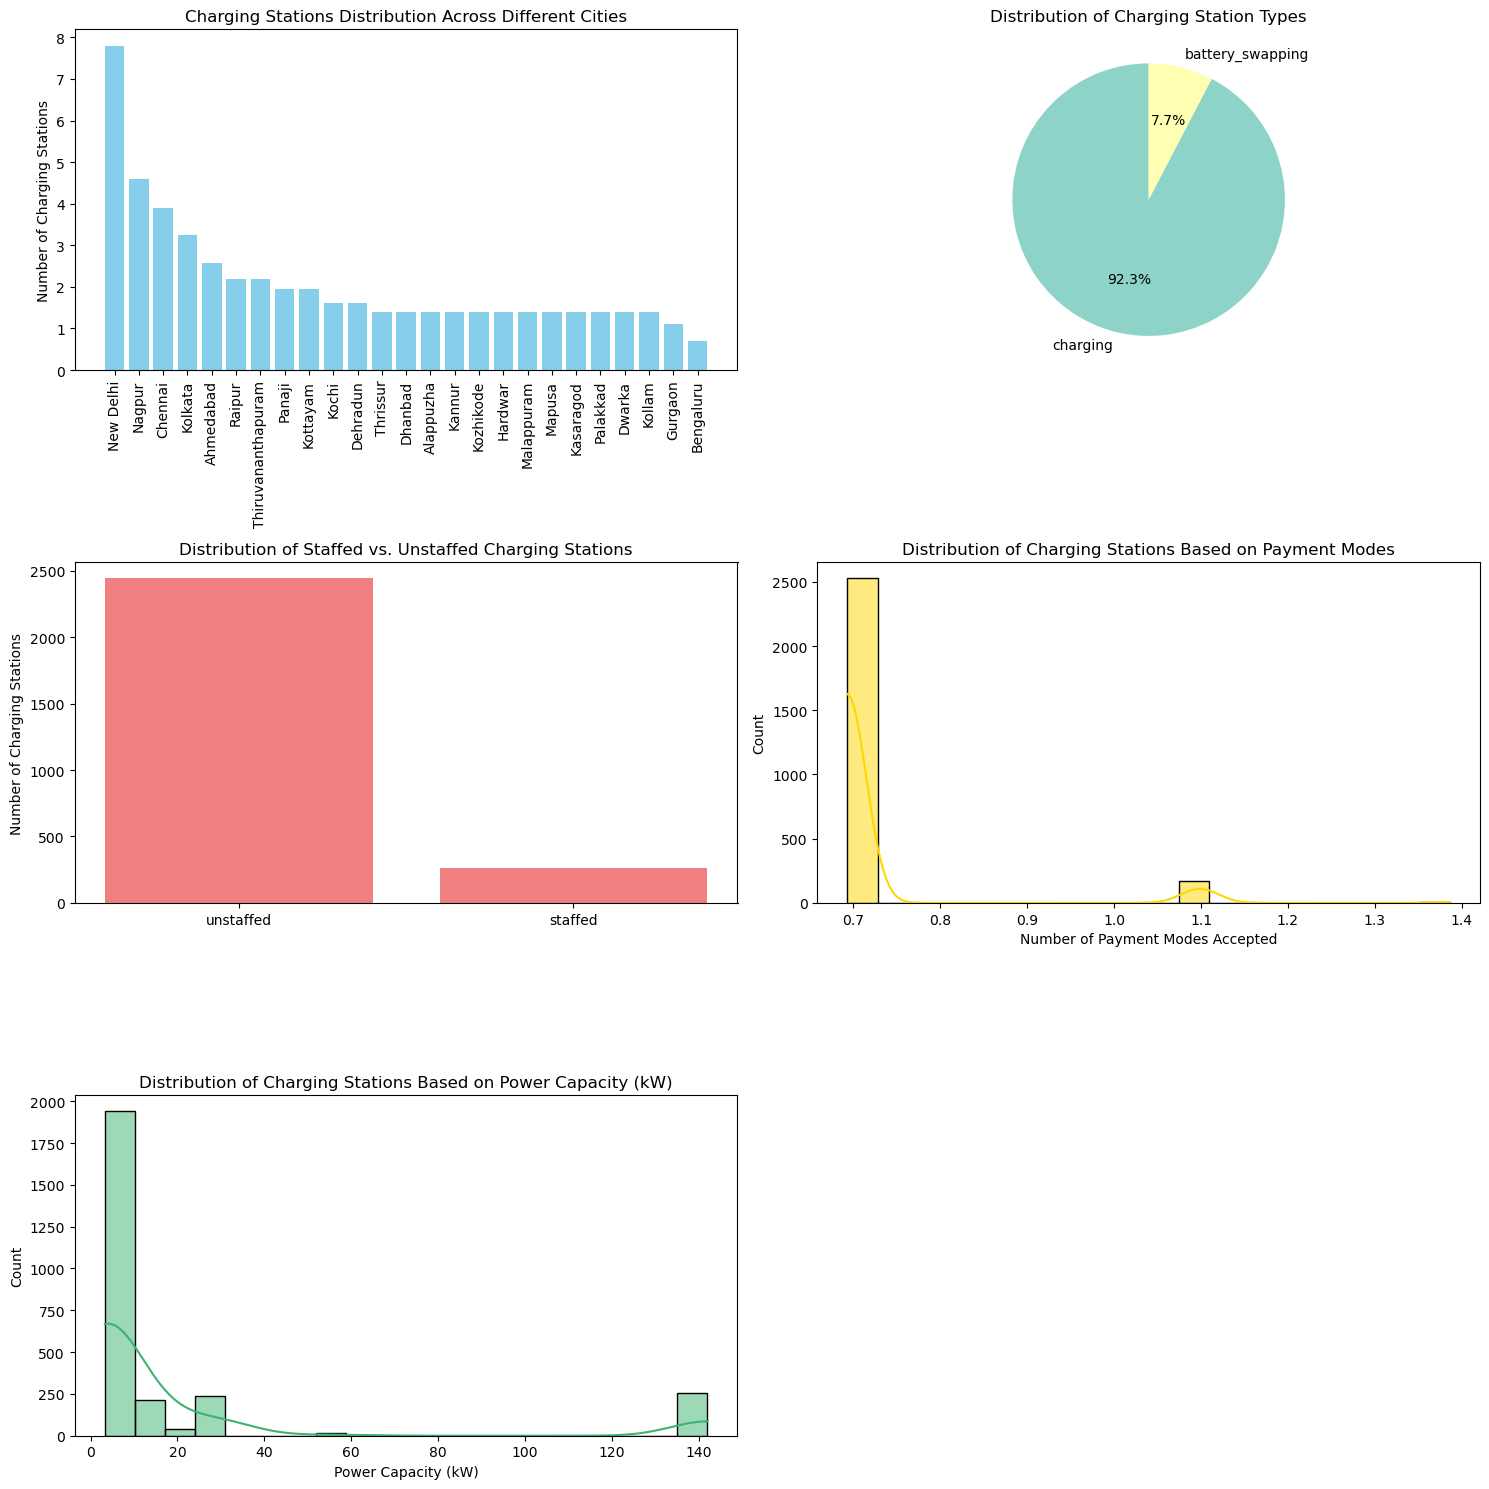

In [15]:
# Set up subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))


# 1. Check the distribution of charging stations across different cities in India.
city_distribution = dataset['city'].value_counts()
city_distribution = np.log1p(city_distribution)
axes[0, 0].bar(city_distribution.index, city_distribution.values, color='skyblue')
axes[0, 0].set_title('Charging Stations Distribution Across Different Cities')
axes[0, 0].set_ylabel('Number of Charging Stations')
axes[0, 0].tick_params(axis='x', rotation=90)

# 2. Explore the distribution of charging station types.
station_type_distribution = dataset['station_type'].value_counts()
axes[0, 1].pie(station_type_distribution, labels=station_type_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
axes[0, 1].set_title('Distribution of Charging Station Types')

# 3. Explore the distribution of stations that are staffed vs. unstaffed.
staff_distribution = dataset['staff'].value_counts()
axes[1, 0].bar(staff_distribution.index, staff_distribution.values, color='lightcoral')
axes[1, 0].set_title('Distribution of Staffed vs. Unstaffed Charging Stations')
axes[1, 0].set_ylabel('Number of Charging Stations')

# 4. Analyze the distribution of charging stations based on payment modes accepted.
payment_modes_distribution = dataset['payment_modes'].apply(lambda x: len(str(x).split(', ')) if pd.notnull(x) else 0)
payment_modes_distribution = np.log1p(payment_modes_distribution)
sns.histplot(payment_modes_distribution, bins=20, kde=True, color='gold', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Charging Stations Based on Payment Modes')
axes[1, 1].set_xlabel('Number of Payment Modes Accepted')

# 5. Explore the distribution of charging stations based on the capacity of power.
dataset['capacity'] = dataset['capacity'].replace({'kW': ''}, regex=True)
dataset['capacity'] = pd.to_numeric(dataset['capacity'], errors='coerce')
sns.histplot(dataset['capacity'], bins=20, kde=True, color='mediumseagreen', ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Charging Stations Based on Power Capacity (kW)')
axes[2, 0].set_xlabel('Power Capacity (kW)')

# Remove empty subplot
fig.delaxes(axes[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()


In [16]:
# Convert 'open' and 'close' columns to datetime
dataset['open'] = pd.to_datetime(dataset['open'])
dataset['close'] = pd.to_datetime(dataset['close'])

# Calculate the time duration for which charging stations are open
dataset['duration'] = dataset['close'] - dataset['open']

# Display the first few rows of the DataFrame with the calculated duration
print(dataset[['open', 'close', 'duration']].head())


        open               close        duration
0 2024-08-14 2024-08-14 23:59:59 0 days 23:59:59
1 2024-08-14 2024-08-14 23:59:59 0 days 23:59:59
2 2024-08-14 2024-08-14 23:59:59 0 days 23:59:59
3 2024-08-14 2024-08-14 23:59:59 0 days 23:59:59
4 2024-08-14 2024-08-14 23:59:59 0 days 23:59:59


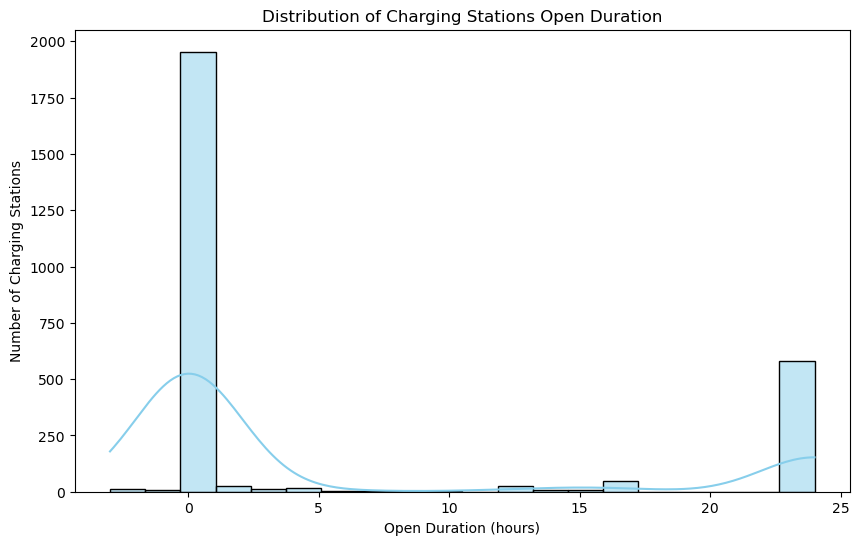

In [17]:
# Plot the distribution of time durations
plt.figure(figsize=(10, 6))
sns.histplot(dataset['duration'].dt.total_seconds() / 3600, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Charging Stations Open Duration')
plt.xlabel('Open Duration (hours)')
plt.ylabel('Number of Charging Stations')
plt.show()

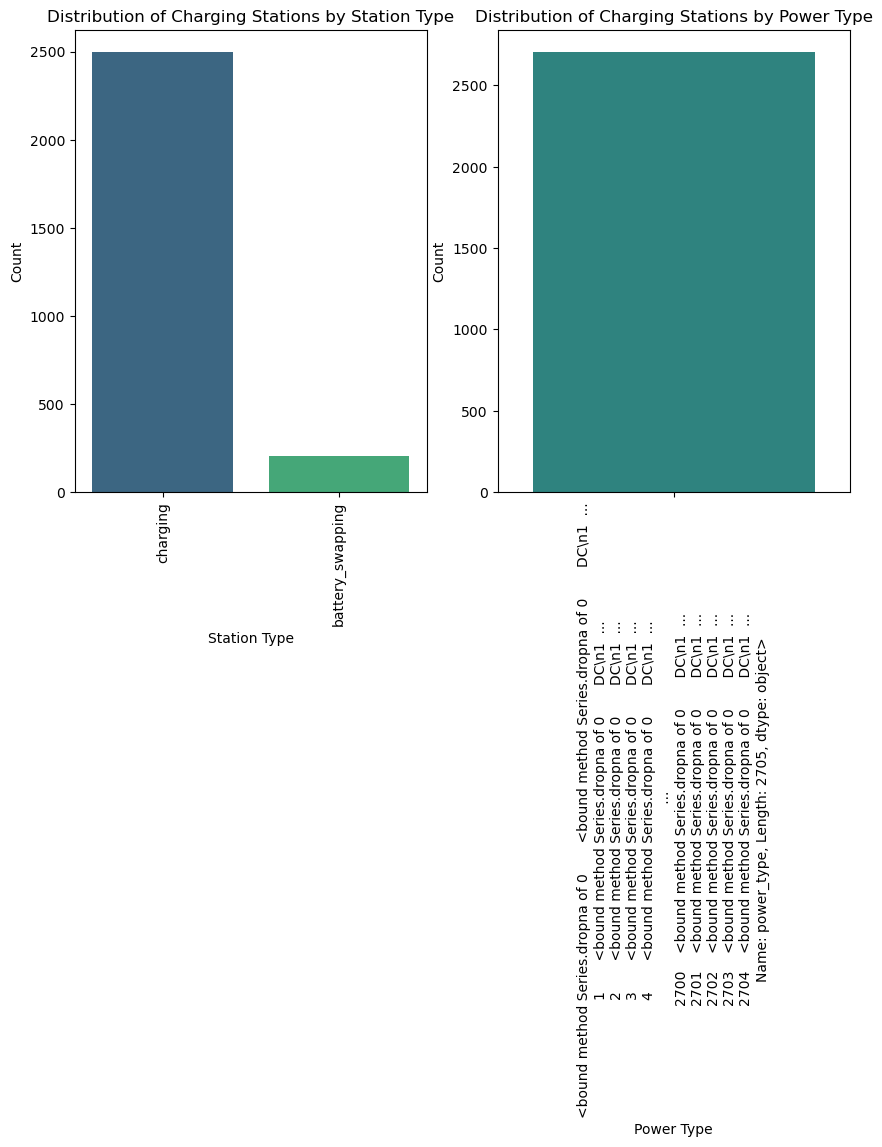

In [23]:
#Create subplots for station type and power type
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Investigate the distribution of cost per unit across different station types
sns.countplot(x='station_type', data=dataset, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Charging Stations by Station Type')
axes[0].set_xlabel('Station Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Investigate the distribution of cost per unit across different power types
sns.countplot(x='power_type', data=dataset, palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of Charging Stations by Power Type')
axes[1].set_xlabel('Power Type')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '3.3'),
  Text(1, 0, '7.0'),
  Text(2, 0, '7.4'),
  Text(3, 0, '9.9'),
  Text(4, 0, '10.0'),
  Text(5, 0, '15.0'),
  Text(6, 0, '16.0'),
  Text(7, 0, '20.0'),
  Text(8, 0, '22.0'),
  Text(9, 0, '26.0'),
  Text(10, 0, '28.0'),
  Text(11, 0, '30.0'),
  Text(12, 0, '50.0'),
  Text(13, 0, '56.0'),
  Text(14, 0, '60.0'),
  Text(15, 0, '142.0')])

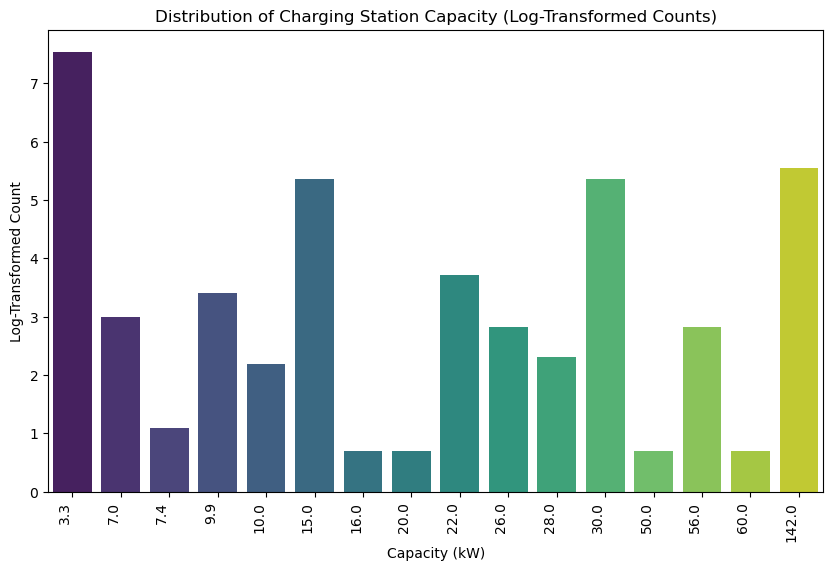

In [26]:
capacity_counts = dataset['capacity'].value_counts()

# Apply logarithm transformation to count values
log_counts = np.log1p(capacity_counts)

# Plot the distribution of charging station capacity with log-transformed counts
plt.figure(figsize=(10, 6))
sns.barplot(x=log_counts.index, y=log_counts.values, palette='viridis')
plt.title('Distribution of Charging Station Capacity (Log-Transformed Counts)')
plt.xlabel('Capacity (kW)')
plt.ylabel('Log-Transformed Count')
plt.xticks(rotation=90, ha='right')

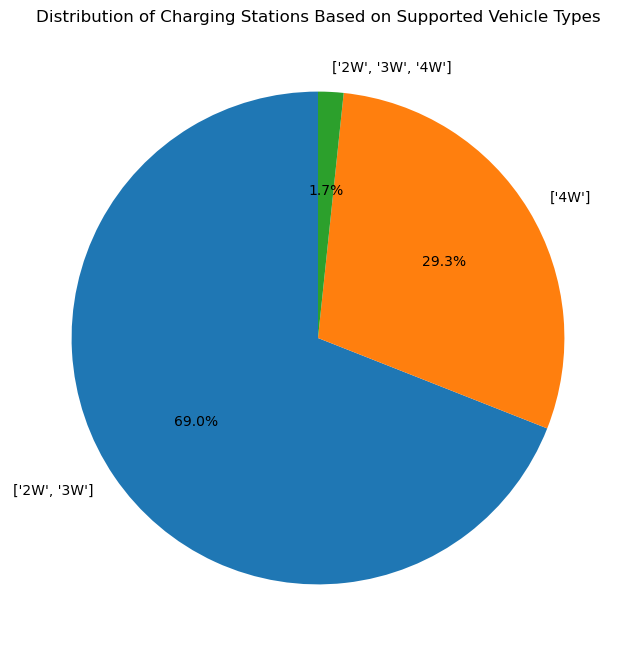

In [27]:
# Create a pie chart for the distribution of charging stations based on supported vehicle types
vehicle_type_counts = dataset['vehicle_type'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Charging Stations Based on Supported Vehicle Types')

# Show the plot
plt.show()

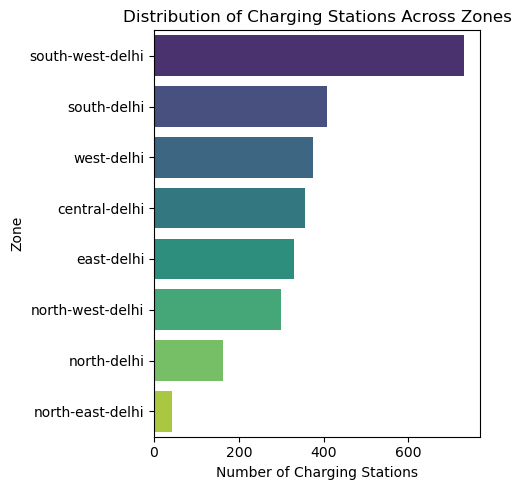

In [29]:
# Calculate the counts for each zone
zone_counts = dataset['zone'].value_counts()

# Sort the zones based on the counts
sorted_zones = zone_counts.sort_values(ascending=False).index

# Create a horizontal bar plot for the distribution of charging stations across different zones
plt.figure(figsize=(5, 5))
sns.countplot(y='zone', data=dataset, order=sorted_zones, palette='viridis')
plt.title('Distribution of Charging Stations Across Zones')
plt.ylabel('Zone')
plt.xlabel('Number of Charging Stations')

# Adjust layout
plt.tight_layout()
plt.show()